# Exercises Lesson 4

Name: Carlos Cocha

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 4.1: Prepare a file with a function called fence such that given two strings as arguments: string_1 = "aaa" and string_2 = "bbb", the output is aaa_bbb_aaa. In the same file define a second function called outer such that given a string returns another string made up of just the first and last characters of its input. Therefore if the input is Betis the function output should be Bs. Include in both cases a docstring with a brief function description and an example. Load the functions from the file and check what is the output of this statement: print outer(fence('carbon', '+')).

In [2]:
# Load the functions
%run extras.py

In [3]:
# Test the first function
fence("aaa", "bbb")

'aaa_bbb_aaa'

In [4]:
# Test the second function
outer("Betis")

'Bs'

In [5]:
# Check the output: 
outer(fence('carbon','+'))

'cn'

### Exercise 4.2: Gaussian distributed data are frequently normalized to have a mean value equal to zero and a standard deviation equal to one substracting the actual mean value and dividing by the standard deviation of the dataset.  Making use of the mean and std NumPy methods, define a function that takes as an argument a data vector, a new mean value, and a new standard deviation value and transforms the original set of data to a new set with a the new mean as its average value and with a dispersion given by the new standard deviation value. By default the function should standardize the data to mean = 0 and sdev = 1.

In [6]:
def gaussian(array, new_mean, new_std):
    '''
    Function that takes as an argument a data vector, a new mean value, and a new standard deviation
    to transform the original set of data to a new set with a the new mean as its average value 
    and with a dispersion given by the new standard deviation value. 
    
    Arguments:

    array :: data vector to be normalized to create a new data vector.
    new_mean  :: average value of a new data vector.
    new_std  :: dispersion value of the new data vector.

    Example:

    gaussian([2,3,4,5,6,3,4], 4,1.2)
    [2.21055728 3.17410336 4.13764944 5.10119552 6.0647416  3.17410336 4.13764944]
    
    '''
    array = np.array(array)
    #standardize the data to mean = 0 and sdev = 1
    x_0 = (array-array.mean())/array.std() 
    #new set with a the new mean and new dispersion
    x_1 = (x_0*new_std) + new_mean            
    return x_1

In [7]:
# Test the function:
test = gaussian([2,3,4,5,6,3,4], 4,1.2)
print(test.mean())
print(test.std())

4.0
1.2


### Exercise 4.3: Define a function that reads out temperature data from the sample Cyprus dataset and prepare graphics. Prepare a function with helpful docstring and comments that for given list of file names prepares a plot with three columns for each data file: the first including the max, min and mean monthly temperatures, the second the max, min, and mean annual temperatures, and the third depicting the monthly temperatures for all years.

In [8]:
def plotting(files):
    '''
    Function that reads out temperature data for given list of file names 
    and prepares a plot with three columns for each data file: 
    the first one including the max, min and mean monthly temperatures, 
    the second one the max, min, and mean annual temperatures, 
    and the third one depicting the monthly temperatures for all years.
    
    Arguments:

    files :: list of file names


    Example:

    plotting(['T_Alicante_EM.csv','T_Alexandroupolis_EM.csv'])
    output: two plots with 3 columns each one
    
    '''    
    path = '/home/nucphys/Downloads/ISP/Python/TData/'
    for i in range(len(files)):
        # Loading the data
        metdata_orig = np.loadtxt(path + files[i], delimiter = ',', skiprows = 1)
        metdata = metdata_orig[:,1:]
        years = metdata_orig[:,0]
        months = ['J','F','M','A','My','Jn','Jl','Ag','S','O','N','D']
        
        # max, min and mean monthly temperatures
        min_monthly = np.min(metdata, axis = 0)
        max_monthly = np.max(metdata, axis = 0)
        mean_monthly = np.mean(metdata, axis = 0)
        
        # max, min, and mean annual temperatures        
        min_anual = np.min(metdata, axis=1)
        max_anual = np.max(metdata, axis=1)
        mean_anual = np.mean(metdata, axis=1)
        
        # Plot settings 
        fig, ax = plt.subplots(nrows = 1, ncols = 3)
        fig.tight_layout(pad =- 1)    
            
        ax[0].plot(months,min_monthly, '--', label = 'min. T')
        ax[0].plot(months,max_monthly, '--', label = 'max. T')
        ax[0].plot(months,mean_monthly,'--', label = 'mean T')
        ax[0].set_xlabel("Months")
        ax[0].set_ylabel('T (ºC)')
        
        ax[1].plot(years,min_anual, '.', label = 'min. T')
        ax[1].plot(years,max_anual, '.', label = 'max. T')
        ax[1].plot(years,mean_anual, '.',label = 'mean T')
        ax[1].set_xlabel("Years")

        
        for j in range(metdata.shape[1]):
            ax[2].plot(years,metdata[:,j], '.', label = months[j])
        
        ax[2].set_xlabel("Years")
        ax[1].set_title(files[i] + " (Dataset)")
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        plt.show()

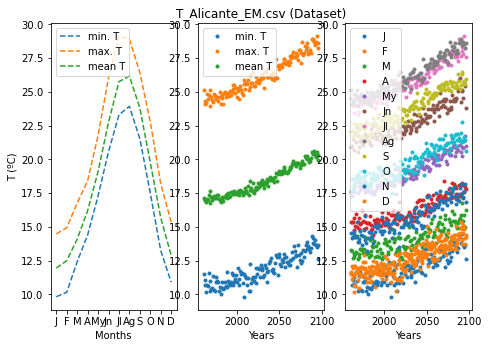

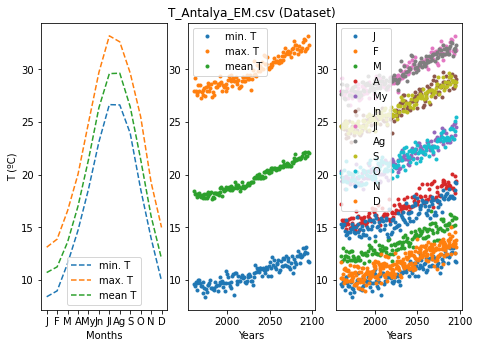

In [9]:
# Test the function       
plotting(['T_Alicante_EM.csv','T_Antalya_EM.csv'])

### Exercise 4.4: Write a function that generates a random password. The password should have a random length of between 10 and 12 random characters from positions 33 to 122 in the ASCII table. Your function will not take any parameters and will return the password as its only result. Make another function that checks if the password has at least two lowcase, two uppercase, and two digit characters and check how many times you need to run the original function to obtain a compliant password.

In [10]:
def password():
    '''
    Function that generates a random password of random
    length of between 10 and 12 random characters 
    from positions 33 to 122 in the ASCII table. 
    
    Example:

    password()
    '+:wydmY5<lUI'
    '''
    lenght = np.random.randint(10,13)
    list_ch = np.random.randint(33,123,[lenght])
    passw = ''
    for i in list_ch:
        # ASCII character using chr() function
        passw += chr(i)
    return passw

In [11]:
# Test the function
password()

'M5M;]"VvEso'

In [12]:
def check(password):
    '''
    Function that checks if a password has at least:
    two lowcase, two uppercase, and two digit characters
    
    Arguments:

    password :: string

    Example:

    check('Lz1[8x?m,JQ')
    True
    '''
    
    num = 0
    upp = 0
    low = 0 
    for i in password:
        # ord() function return the ASCII character index
        if ord(i) >= 48 and ord(i) <= 57:
            num += 1
        elif  ord(i) >= 65 and ord(i) <= 90:
            upp += 1
        elif  ord(i) >= 97 and ord(i) <= 122:
            low += 1
    if num >= 2 and upp >= 2 and low >= 2:
            test = True
    else:
            test = False
    return test

In [13]:
# check how many times we need to obtain a compliant password
test = False
counter = 1
while test == False:
    passw = password()
    test = check(passw)
    if test == False:
        counter += 1
print('The desired password',passw, 'was obtained in',counter,'attempts') 

The desired password X5,Y5NEv[@n was obtained in 7 attempts
